This notebook is an adaptation of [2] and provides a starting point for training fully connected NNs.

It shows how to use a dataset from tensorflow and display images from the training and test sets.

Builds a fully connected network and shows results and after training



### Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2023-03-31 09:33:37.695210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 09:33:37.809243: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 09:33:38.564083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-31 09:33:38.564122: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

## Auxiliary functions to show plots of training history and display images

In [2]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.show()


def show_images(rows, cols, data):

    width= 2 * rows
    height= 2 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = x_train[a]
        subplot_title=("class "+str(y_train[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :], cmap=plt.cm.binary)
        axes.ravel()[a].axis('off')
    fig.tight_layout()    
    plt.show() 
    
    
    
def show_image(number):
    plt.figure()
    plt.imshow(x_train[number], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [3]:
class_names = np.array(['0','1', '2', '3', '4', '5', '6', '7', '8', '9'])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

def plot_predictions(predictions, ground_truth, num_rows= 5, num_cols=3 ):

    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions[i], ground_truth, x_test)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions[i], ground_truth)
    plt.tight_layout()
    plt.show()
    
    
def show_misclassified(predictions, ground_truth, num_rows= 5, num_cols=3):
    
    # Plot the first X test images with wrong predictions.
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    i = 0
    k = 0
    while i < num_images:
        predicted_label = np.argmax(predictions[k])
        if predicted_label != y_test[k]:
            plt.subplot(num_rows, 2*num_cols, 2*i+1)
            plot_image(k, predictions[k], ground_truth, x_test)
            plt.subplot(num_rows, 2*num_cols, 2*i+2)
            plot_value_array(k, predictions[k], ground_truth)
            i += 1
        k += 1
    plt.tight_layout()
    plt.show()
    

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)


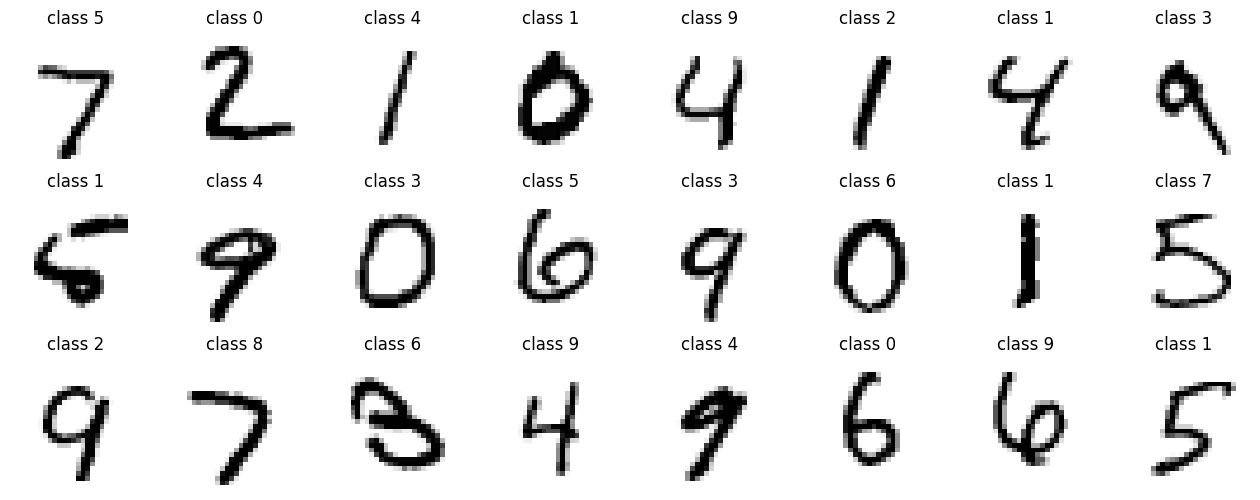

<Figure size 640x480 with 0 Axes>

In [6]:
show_images(3,8, x_test)

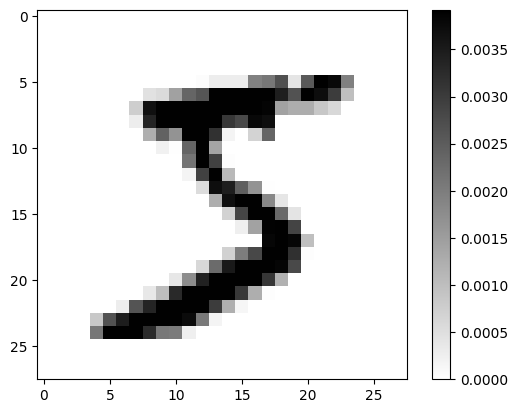

In [8]:
x_train, x_test = x_train/255.0, x_test/255.0
show_image(0)

In [9]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28), name="flatten_image"))
model.add(tf.keras.layers.Dense(64, activation='relu', name="hidden"))
model.add(tf.keras.layers.Dense(10, activation='softmax', name="output"))

2023-03-31 09:42:53.072140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-31 09:42:53.228182: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-31 09:42:53.228208: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-31 09:42:53.229198: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_image (Flatten)     (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 64)                50240     
                                                                 
 output (Dense)              (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
predictions = model.predict(x_test)
print(predictions[0], y_test[0])

313/313 [==============================] - 0s 425us/step
[0.1000355  0.09994949 0.09986359 0.10012611 0.10023261 0.09969231
 0.10007282 0.09989271 0.10007107 0.10006382] 7


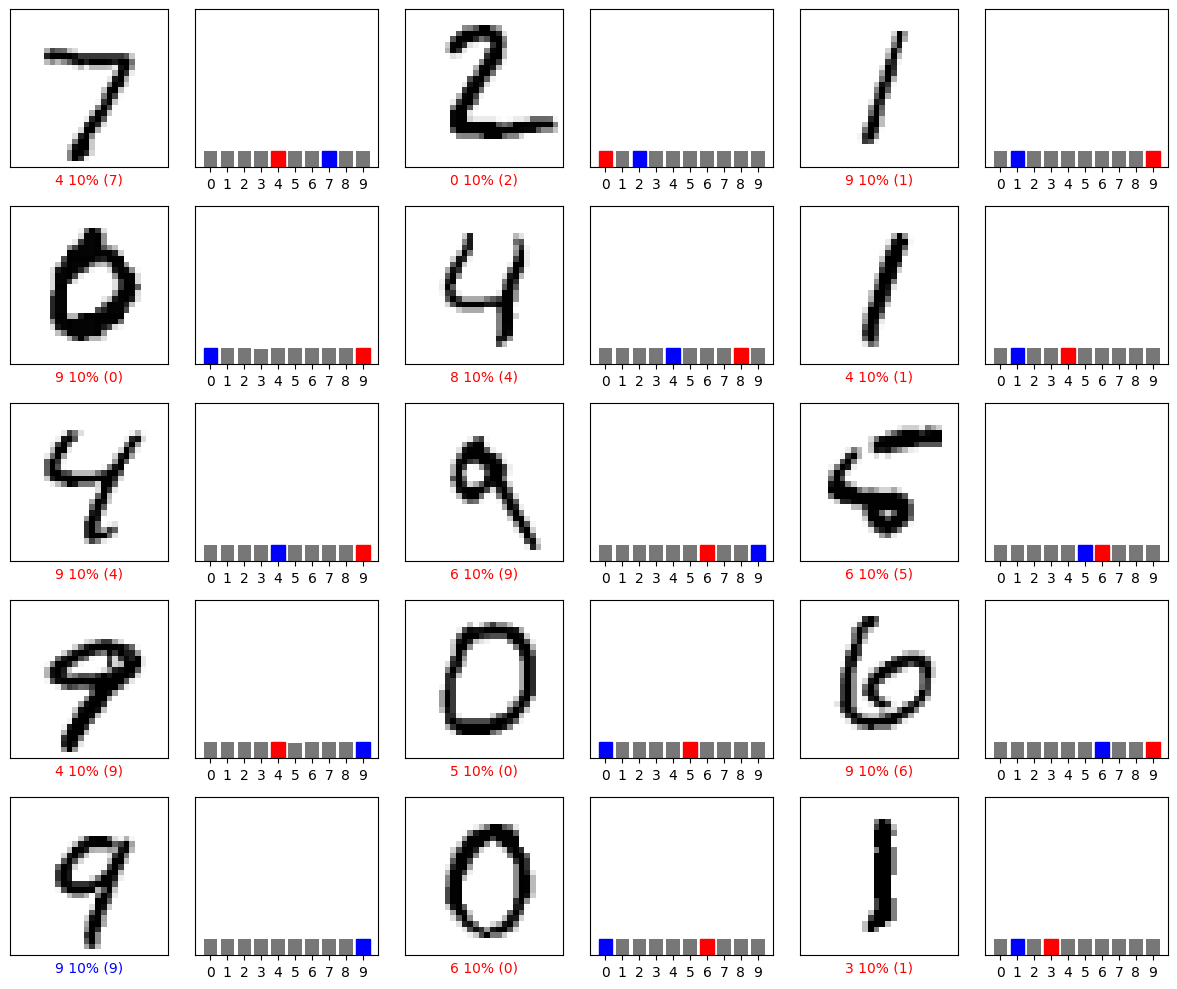

In [14]:
plot_predictions(predictions, y_test, 5,3)

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(32)

In [18]:
@tf.function

def train_step(x,y):
    with tf.GradientTape() as tape:
        
        outputs = model(x)
        loss = loss_fn(y, outputs)
        
    grads = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    
    return loss

def train(epochs):
    
    for epoch in range(epochs):
        loss = 0
        epoch_loss = 0
        
        for(x_batch, y_batch) in train_dataset:
            epoch_loss += train_step(x_batch, y_batch)
            
        print('Epoch: ', epoch, ' Loss: ', epoch_loss)
        
train(3)

Epoch:  0  Loss:  tf.Tensor(699.3969, shape=(), dtype=float32)
Epoch:  1  Loss:  tf.Tensor(643.4688, shape=(), dtype=float32)
Epoch:  2  Loss:  tf.Tensor(608.5053, shape=(), dtype=float32)


In [19]:
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

eval = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.3069 - accuracy: 0.9136 - 308ms/epoch - 984us/step


313/313 [==============================] - 0s 555us/step


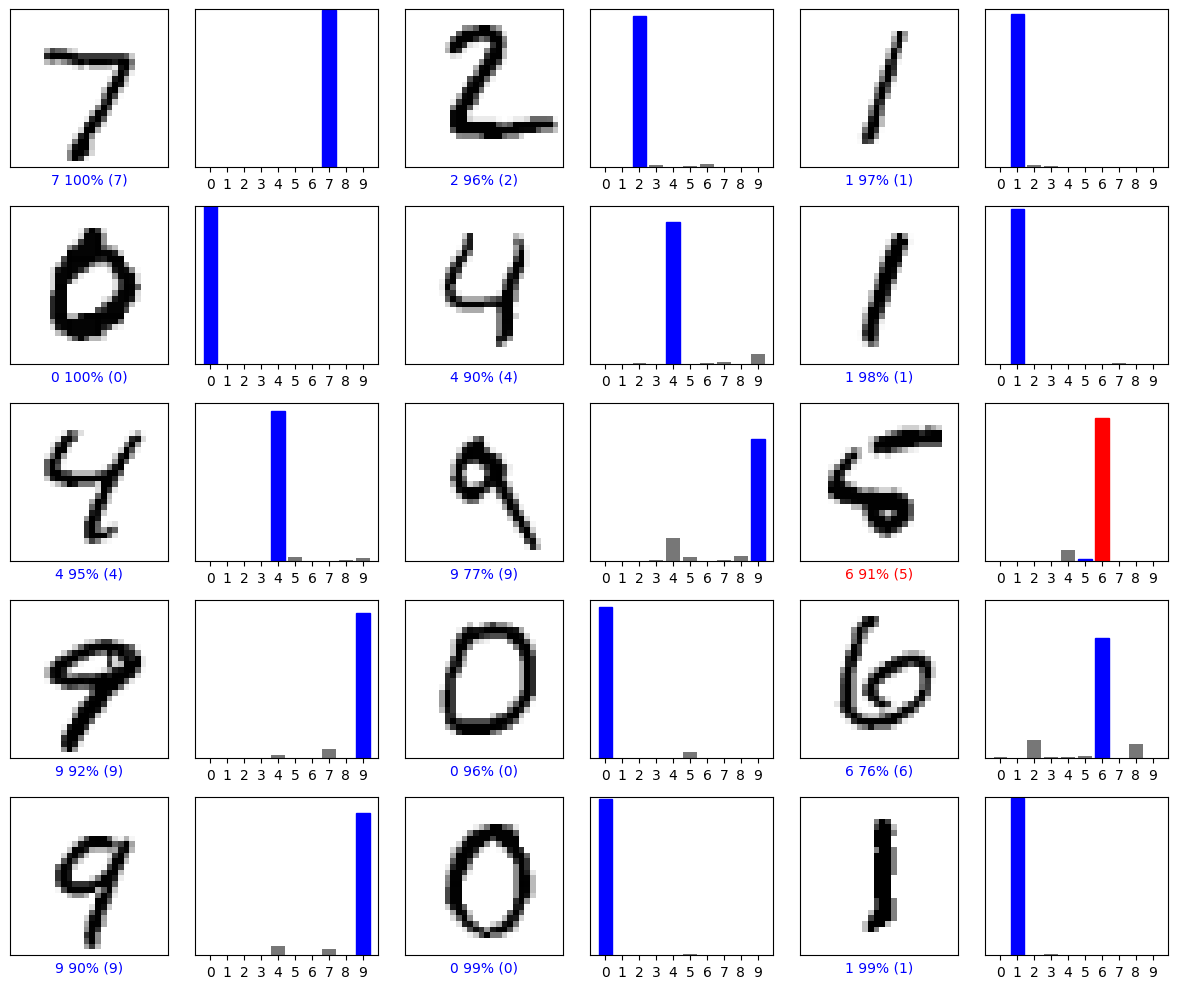

In [21]:
predictions = model.predict(x_test)

plot_predictions(predictions, y_test, 5,3)

In [22]:
history = model.fit(x_train, y_train, batch_size=32, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 1s 685us/step - loss: 0.3107 - accuracy: 0.9117
Epoch 2/15
1875/1875 [==============================] - 1s 646us/step - loss: 0.3000 - accuracy: 0.9143
Epoch 3/15
1875/1875 [==============================] - 1s 652us/step - loss: 0.2919 - accuracy: 0.9165
Epoch 4/15
1875/1875 [==============================] - 1s 640us/step - loss: 0.2844 - accuracy: 0.9183
Epoch 5/15
1875/1875 [==============================] - 1s 646us/step - loss: 0.2781 - accuracy: 0.9200
Epoch 6/15
1875/1875 [==============================] - 1s 641us/step - loss: 0.2725 - accuracy: 0.9217
Epoch 7/15
1875/1875 [==============================] - 1s 643us/step - loss: 0.2670 - accuracy: 0.9228
Epoch 8/15
1875/1875 [==============================] - 1s 651us/step - loss: 0.2617 - accuracy: 0.9242
Epoch 9/15
1875/1875 [==============================] - 1s 651us/step - loss: 0.2564 - accuracy: 0.9263
Epoch 10/15
1875/1875 [==============================] - 1s 647u

dict_keys(['loss', 'accuracy'])


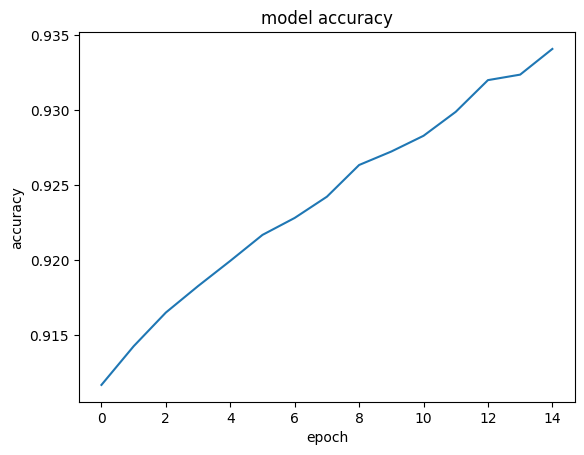

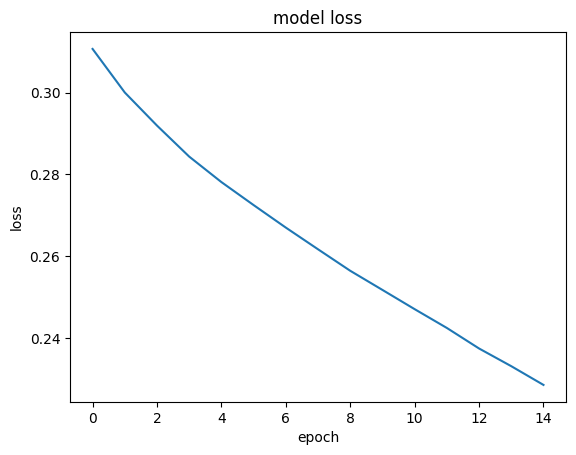

In [23]:
show_history(history)

In [24]:
eval = model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.2291 - accuracy: 0.9338 - 181ms/epoch - 577us/step


313/313 [==============================] - 0s 492us/step


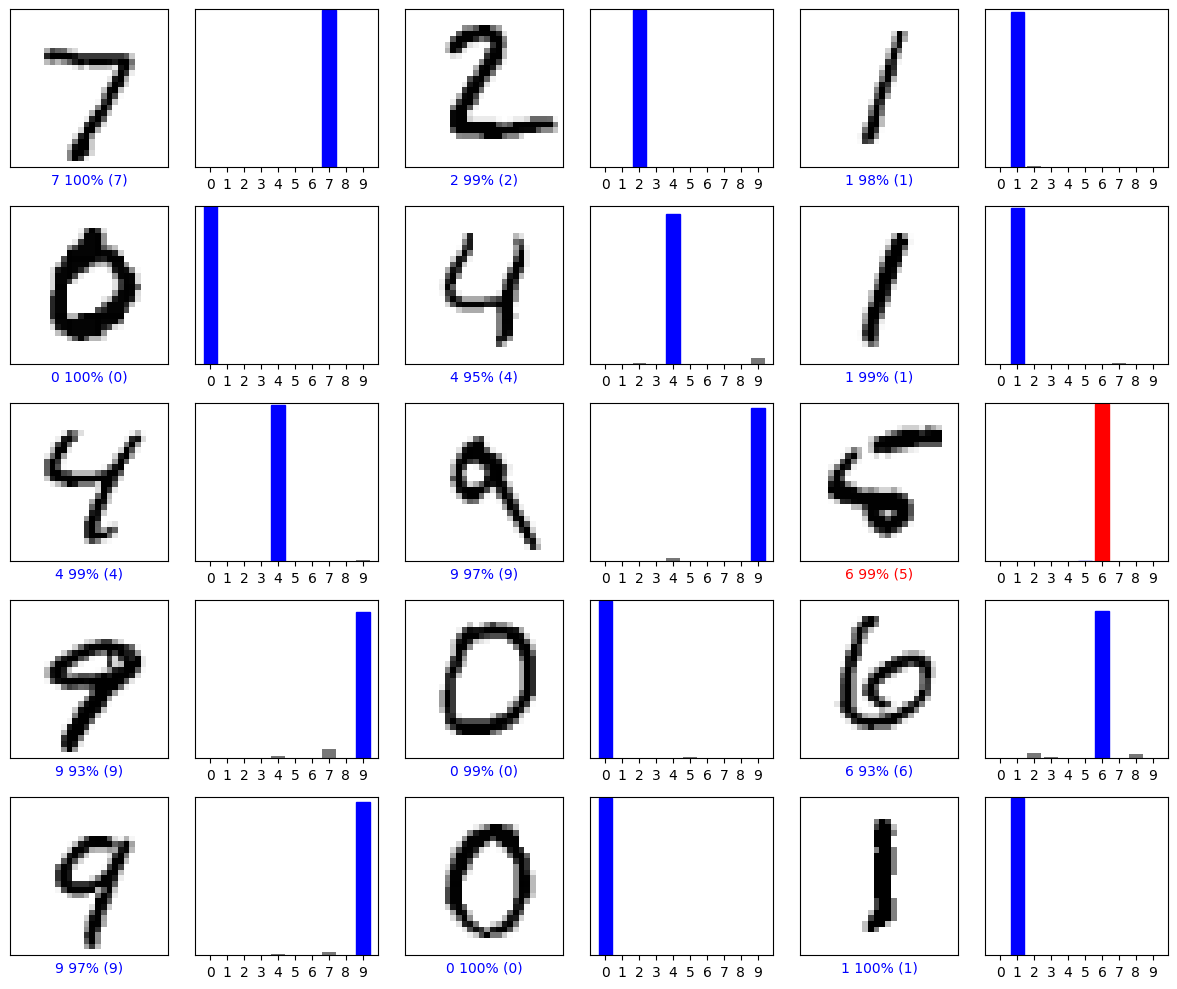

In [25]:
predictions = model.predict(x_test)
plot_predictions(predictions, y_test, 5, 3)

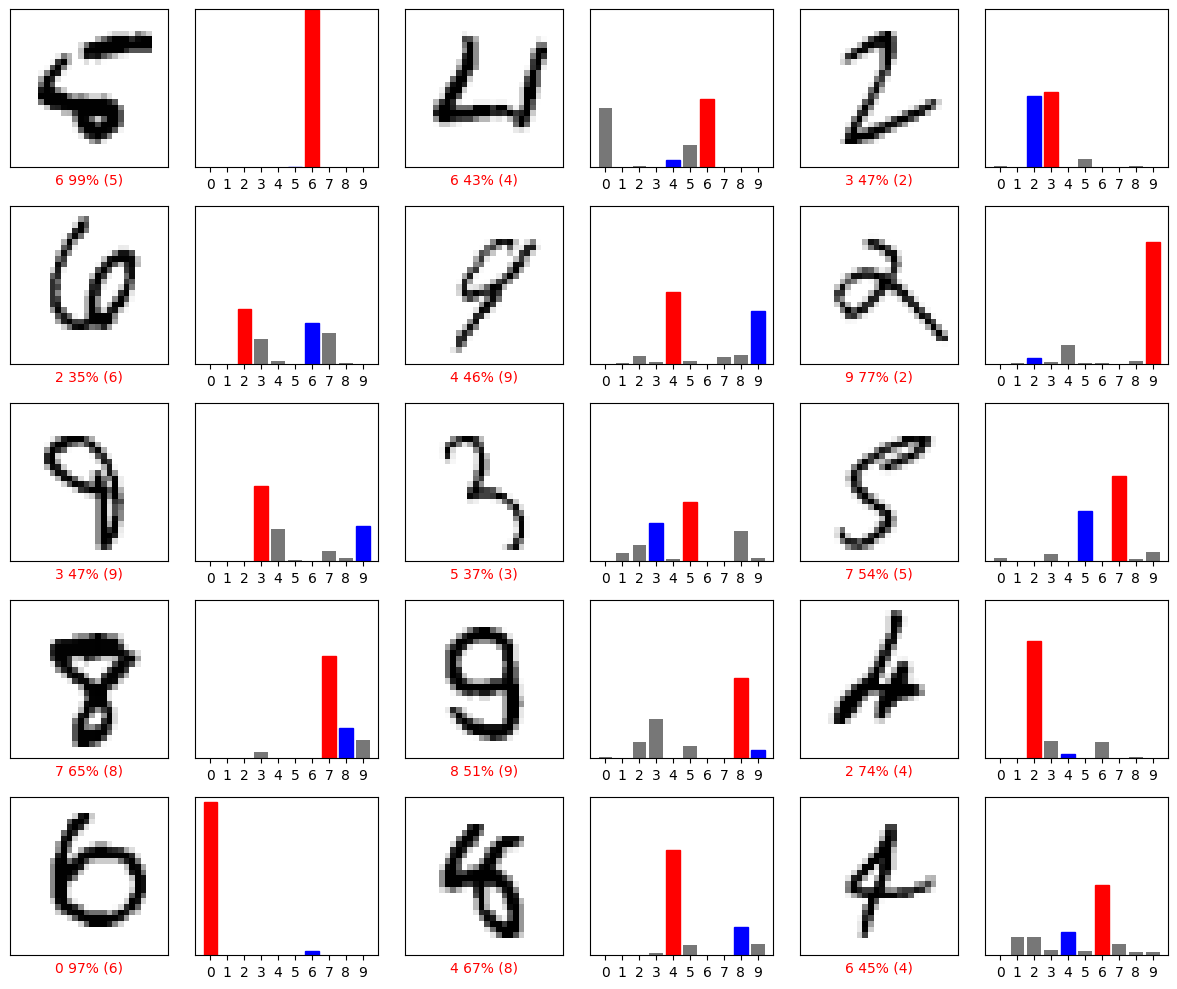

In [26]:
show_misclassified(predictions, y_test, 5, 3)

In [27]:
from collections import Counter

print(Counter(y_train))

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [28]:
predictions[0]

array([4.6024015e-05, 3.4596459e-09, 3.4193779e-04, 3.1774929e-03,
       9.3385506e-07, 5.3023403e-05, 6.8777783e-10, 9.9577266e-01,
       7.3591591e-06, 6.0056889e-04], dtype=float32)

In [29]:
pred = [np.argmax(x) for x in predictions]

In [30]:
pred[0]

7

In [31]:
conf_mat = tf.math.confusion_matrix(y_test, pred)

<Axes: >

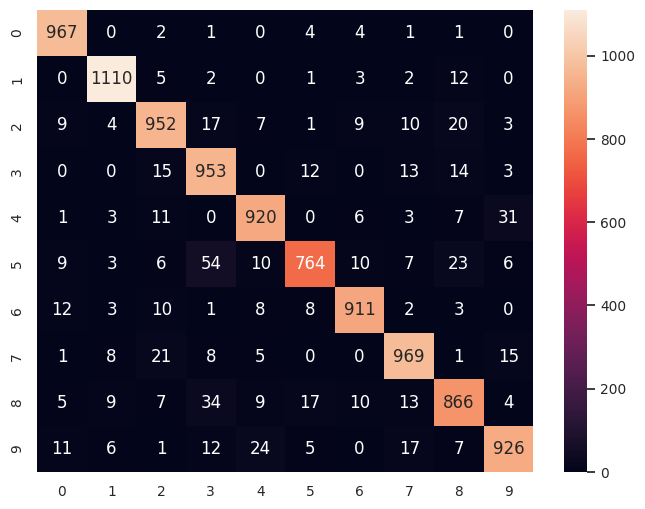

In [37]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(conf_mat.numpy(), range(10), range(10))
plt.figure(figsize = (8,6))
sn.set(font_scale=0.9)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12}, fmt='g')